In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Masalah Umum pada image sesuai dalam perkuliahan:
1. low contrast => contrast stretching
2. terlalu gelap => HE, CLAHE, dll
3. terlalu terang =>HE, CLAHE, dll
4. terlalu tajam => smoothing
5. Noisy image => denoising, low pass filter
6. blur=> sharpening
7. resolusi kecil => upsampling

**Masalah low contrast**

Low contrast: rentang minimum dan maximum pixel terlalu pendek
Secara umum masalah low contrast dapat diselesaikan denngan contrast stretching

adapun dalam penyelesaian ini, ditunjukkan histogram equalization (HE) dan variannya mampu juga mengatasi masalah low contrast.

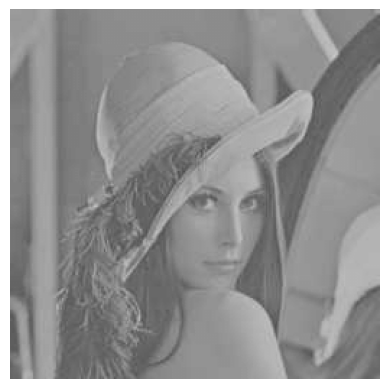

In [2]:
#load image rgb
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/low contrast 3.ppm'
try:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image at '{image_path}' not found or cannot be read.")
    else:
        plt.imshow(image, cmap='gray')  #
        plt.axis('off')
        plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

76 205


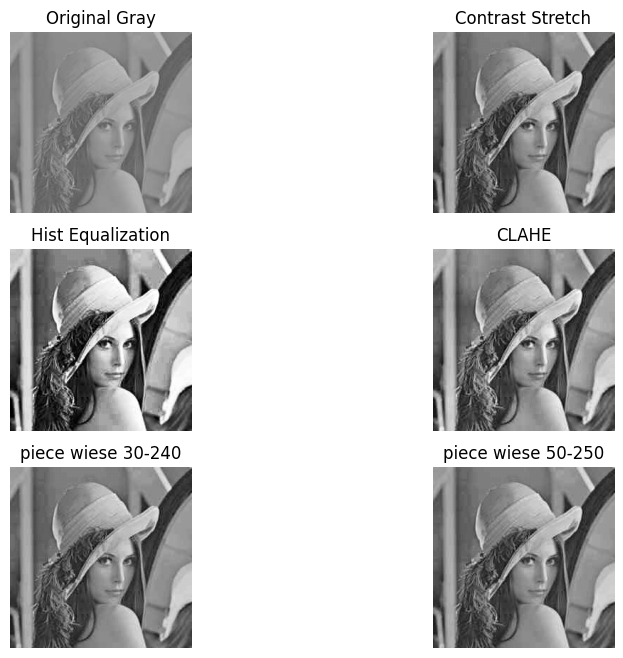

In [3]:
#ENHANCEMENT UNTUK LOW CONTRAST
import numpy as np
#konnversi ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
min_val, max_val = np.min(image_gray), np.max(image_gray)
print(min_val,max_val)
#strecth kan dengan contrast strecth, memastikam nilai dari minimal ke maximal 0-255
contrast_stretch = ((image_gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray)

#clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_gray)

# Piecewise stretching
def piecewise_stretch(img, a, b):
    imgf = img.astype(np.float32)

    scale = 255.0 / max(1, (b - a))
    mid = (imgf - a) * scale

    out = np.where((imgf >= a) & (imgf <= b), mid, imgf)
    # hanya stretch di dalam [a,b], di luar tetap pakai nilai asli

    return np.clip(out, 0, 255).astype(np.uint8)



hasil_ps1 = piecewise_stretch(image_gray,10,245)
hasil_ps2 = piecewise_stretch(image_gray,5,250)


# tampilkan sebelum & sesudah
titles = ['Original Gray', 'Contrast Stretch', 'Hist Equalization', 'CLAHE','piece wiese 30-240','piece wiese 50-250']
images = [image, contrast_stretch, histeq, clahe_img,hasil_ps1,hasil_ps2]

plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Dari hasil di atas, seharusnya low contrast cukup dihandle dengan menggunakan contrast stretching, baik dengan menentukan nilai minimal ke maksimal kemudian digeser ke 0 sampai 255, atau dengan piece wiese (hanya sekala tertentu yg di expand). dari gambar tersebut juga dapat diketahui HE dan CLAHE walaupun secara umum digunakan untuk gambar terlalu gelap atau cerah, dapat juga digunakan untuk meningkatkan kontrast


**gambar terlalu gelap dan terang**

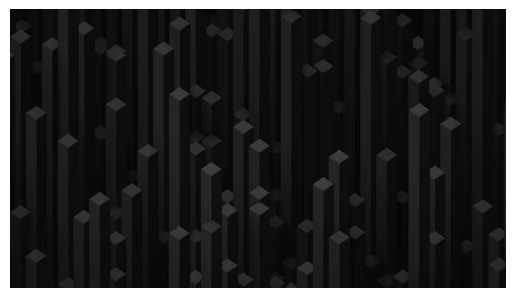

In [4]:
image_path_gelap = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/too dark.jpg'

try:
    image_gelap = cv2.imread(image_path_gelap)
    if image_gelap is None:
        print(f"Error: Image at '{image_path_gelap}' not found or cannot be read.")
    else:
        plt.imshow(image_gelap, cmap='gray')  #
        plt.axis('off')
        plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

nilai terendah dan tertinggi pada gambar gelap adalah  0 dan  71
nilai terendah dan tertinggi pada gambar HE adalah  0 dan  255
nilai terendah dan tertinggi pada gambar clahe adalah  0 dan  168


Visualisasi gambar sebelum dan setelah HE dan CLAHE


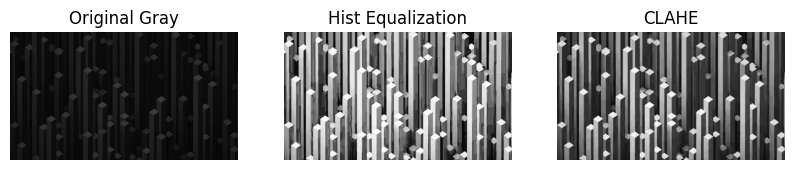

In [5]:
#ENHANCEMENT UNTUK terlalu gelap

image_gray_gelap = cv2.cvtColor(image_gelap, cv2.COLOR_BGR2GRAY)
min_val_gelap, max_val_gelap = np.min(image_gray_gelap), np.max(image_gray_gelap)
print("nilai terendah dan tertinggi pada gambar gelap adalah ",min_val_gelap,"dan ",max_val_gelap)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray_gelap)

#clahe
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(2,2))
clahe_img = clahe.apply(image_gray_gelap)

min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
print("nilai terendah dan tertinggi pada gambar HE adalah ",min_val_terang_histeq,"dan ", max_val_terang_histeq)
print("nilai terendah dan tertinggi pada gambar clahe adalah ",min_val_terang_clahe,"dan ", max_val_terang_clahe)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah HE dan CLAHE")
titles = ['Original Gray', 'Hist Equalization', 'CLAHE']
images = [image_gelap,  histeq, clahe_img]

plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

terlihat dari gambar di atas, kalau minimum pixel 0 dan max hanya di 71. berarti ini sangat gelap. sehingga cocok didekati dengan AHE atau *CLAHE*

nilai terendah dan tertinggi pada gambar terang adalah  91 dan  255
nilai terendah dan tertinggi pada gambar terang HE adalah  0 dan  255
nilai terendah dan tertinggi pada gambar terang CLAHE adalah  26 dan  255


Visualisasi gambar sebelum dan setelah HE dan CLAHE


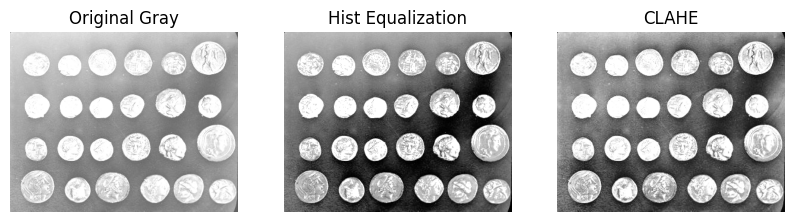

In [6]:
#ENHANCEMENT UNTUK terlalu cerah
image_path_terang = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/coins_gray_too_bright.png'
image_terang = cv2.imread(image_path_terang)
image_gray_terang = cv2.cvtColor(image_terang, cv2.COLOR_BGR2GRAY)
min_val_terang, max_val_terang = np.min(image_gray_terang), np.max(image_gray_terang)
print("nilai terendah dan tertinggi pada gambar terang adalah ",min_val_terang,"dan ",max_val_terang)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray_terang)

#clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
clahe_img = clahe.apply(image_gray_terang)
min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
print("nilai terendah dan tertinggi pada gambar terang HE adalah ",min_val_terang_histeq,"dan ", max_val_terang_histeq)
print("nilai terendah dan tertinggi pada gambar terang CLAHE adalah ",min_val_terang_clahe,"dan ", max_val_terang_clahe)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah HE dan CLAHE")
titles = ['Original Gray', 'Hist Equalization', 'CLAHE']
images = [image_terang,  histeq, clahe_img]

plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

**IMAGE DENOISING DAN SHARPENING**

DENOISING DARI SALT AND PEPPER NOISE DENGAN MEDIAN FILTERING
SHARPENING DENGAN AWALNYA KITA SMOOTHKAN DENGAN GAUSSIAN, KEMUDIAN MEMANFAATKAN LAPLACIAN FILTER UNTUK MENDAPAT DETAIL, SEHINGGA SHARPENNED: ORIGINAL +DETAIL



Visualisasi gambar sebelum dan setelah denoising dan sharpening


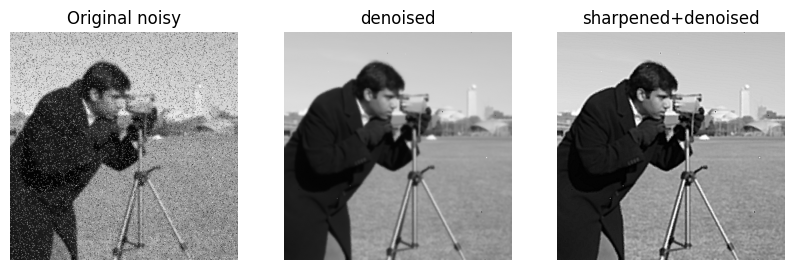

In [7]:
#path
image_path_noisy_blur = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/noisy_blur.png'
 #-------------- READ IMAGE --------------
img_blur = cv2.imread(image_path_noisy_blur, cv2.IMREAD_UNCHANGED)
if img_blur is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {image_path_noisy_blur}")

# Jika ada alpha (BGRA), buang alpha
if img_blur.ndim == 3 and img_blur.shape[2] == 4:
    img_blur  = cv2.cvtColor(img_blur, cv2.COLOR_BGRA2BGR)

# Pastikan tipe uint8 untuk tampilan/processing
if img_blur.dtype != np.uint8:
    img_blur = cv2.normalize(img_blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

is_gray = (img_blur.ndim == 2) or (img_blur.ndim == 3 and img_blur.shape[2] == 1)

# -------------- (2) NOISE REMOVAL --------------
# Median filter efektif untuk Salt & Pepper noise
# ksize bisa 3 atau 5 (semakin besar semakin bersih tapi bisa makin blur)
ksize = 3
denoised = cv2.medianBlur(img_blur, ksize)

# -------------- (3) SHARPENING : -------------
#Konsep Sharpening: sharp = den - α·Laplacian. sblm ny tp di smooth pakai gaussian -

# ---- Laplacian of Gaussian (kurangi sensitivitas noise) ----
sigma  = 1.0                           # 0.8–1.6
blur   = cv2.GaussianBlur(denoised, (0,0), sigma) #smoothing dl
lap16  = cv2.Laplacian(blur, cv2.CV_16S, ksize=3)  # ini edge detection/detail tepi

# sharpen = den - α * Laplacian(den)
alpha  = 0.9
sh16   = denoised.astype(np.int16) - (alpha * lap16)#sharpened= awal +detail nya
sharpened  = np.clip(sh16, 0, 255).astype(np.uint8)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah denoising dan sharpening")
titles = ['Original noisy', 'denoised', 'sharpened+denoised']
images = [img_blur,  denoised, sharpened]
plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

